<a href="https://colab.research.google.com/github/Zee05/JSE-Stock-Market-Returns-Prediction-Using-Multivariate-Time-Series-Data/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import thư viện

In [24]:
import math
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix

#Chuẩn bị dữ liệu

In [25]:
# Tải dữ liệu
df = pd.read_csv(r'AAPL.csv')

# Xử lí dữ liệu thiếu
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/02/2019,38.722500,39.712502,38.557499,39.480000,37.994492,148158800
1,01/03/2019,35.994999,36.430000,35.500000,35.547501,34.209965,365248800
2,01/04/2019,36.132500,37.137501,35.950001,37.064999,35.670361,234428400
3,01/07/2019,37.174999,37.207500,36.474998,36.982498,35.590965,219111200
4,01/08/2019,37.389999,37.955002,37.130001,37.687500,36.269440,164101200


In [26]:
df.shape

(1008, 7)

In [27]:
# Chọn các thuộc tính để làm tính năng đầu vào và nhãn
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
labels = df['Adj Close']  # Giá điều chỉnh làm nhãn

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(df) * 0.8)  # 80% dữ liệu cho huấn luyện
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]
print(len(train_features))
print(len(test_features))

806
202


#Xây dựng mô hình Random Forests

In [28]:
# 500 cây quyết định, độ sâu tối đa là 10
rf = RandomForestRegressor(n_estimators = 500, max_depth=10, random_state = 42)

#Huấn luyện mô hình

In [29]:
# Tạo mô hình Random Forests
model = RandomForestRegressor()

# Huấn luyện mô hình
model.fit(train_features, train_labels)


RandomForestRegressor()

#Visualize và phân tích dữ liệu

Text(0.5, 1.0, 'Biểu đồ biến động giá cổ phiếu lúc mở phiên')

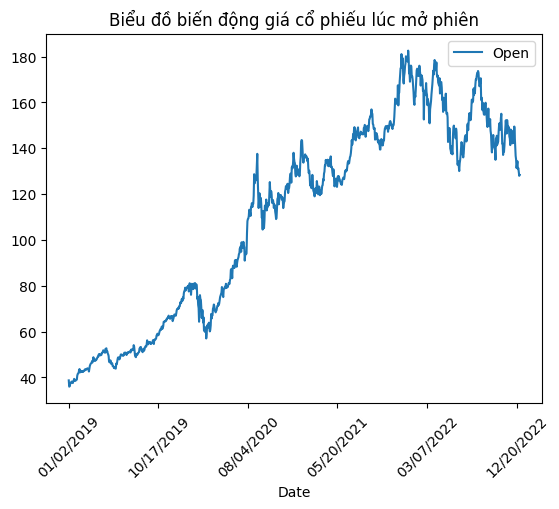

In [30]:
df.plot(x ="Date", y ="Open")
plt.xticks(rotation=45)
plt.title("Biểu đồ biến động giá cổ phiếu lúc mở phiên")

Text(0.5, 1.0, 'Biểu đồ biến động giá cổ phiếu lúc đóng phiên')

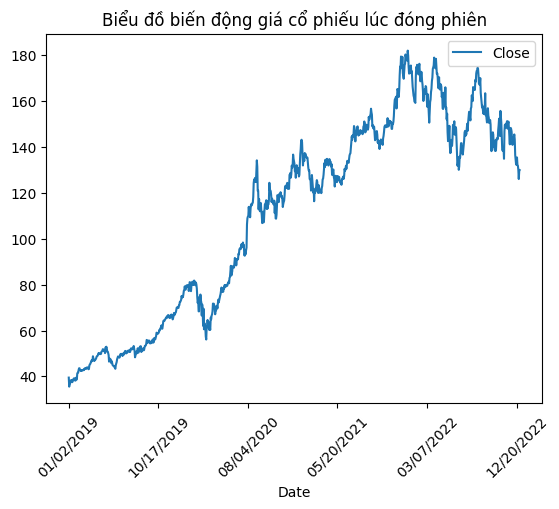

In [31]:
df.plot(x ="Date", y ="Close")
plt.xticks(rotation=45)
plt.title("Biểu đồ biến động giá cổ phiếu lúc đóng phiên")

Text(0.5, 1.0, 'Biểu đồ biến động giá cổ phiếu lúc đóng phiên có điều chỉnh giá')

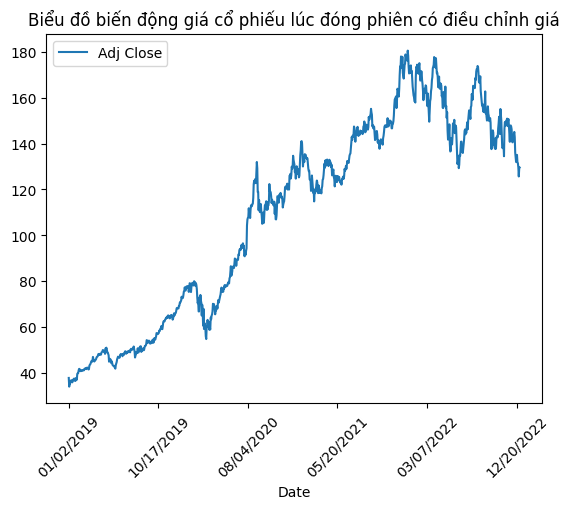

In [32]:
df.plot(x="Date", y="Adj Close")
plt.xticks(rotation=45)
plt.title("Biểu đồ biến động giá cổ phiếu lúc đóng phiên có điều chỉnh giá")

Text(0.5, 1.0, 'Biểu đồ giá cổ phiếu thấp nhất trong ngày')

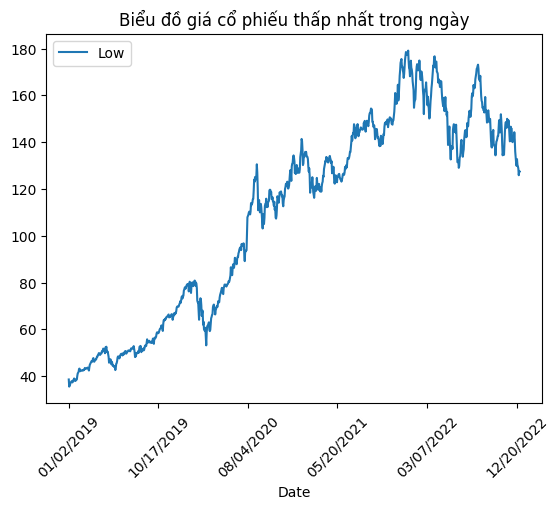

In [33]:
df.plot(x="Date", y="Low")
plt.xticks(rotation=45)
plt.title("Biểu đồ giá cổ phiếu thấp nhất trong ngày")

Text(0.5, 1.0, 'Biểu đồ giá cổ phiếu cao nhất trong ngày')

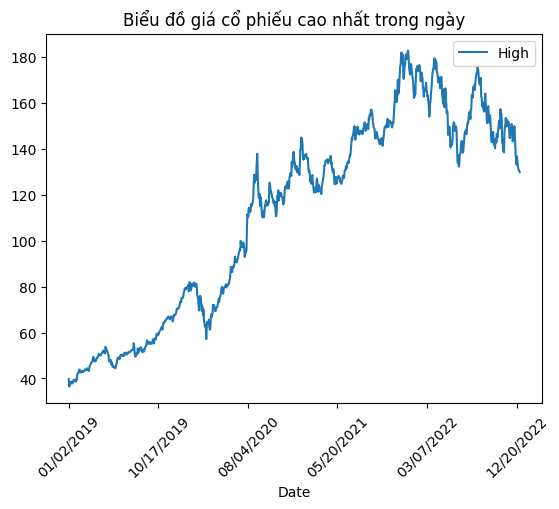

In [34]:
df.plot(x="Date", y="High")
plt.xticks(rotation=45)
plt.title("Biểu đồ giá cổ phiếu cao nhất trong ngày")

Text(0.5, 1.0, 'Biểu đồ biến động khối lượng giao dịch mỗi phiên')

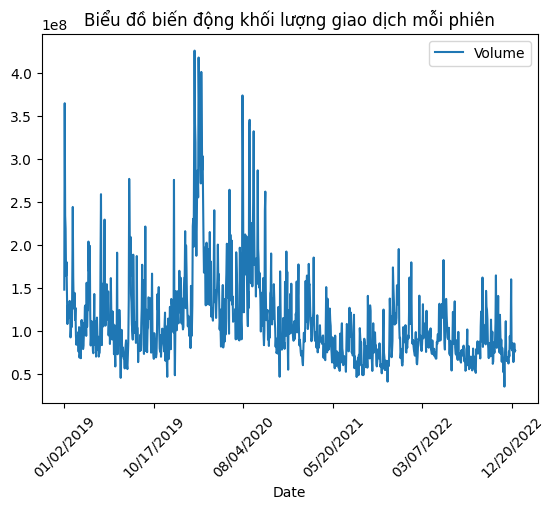

In [35]:
df.plot(x="Date", y="Volume")
plt.xticks(rotation=45)
plt.title("Biểu đồ biến động khối lượng giao dịch mỗi phiên")

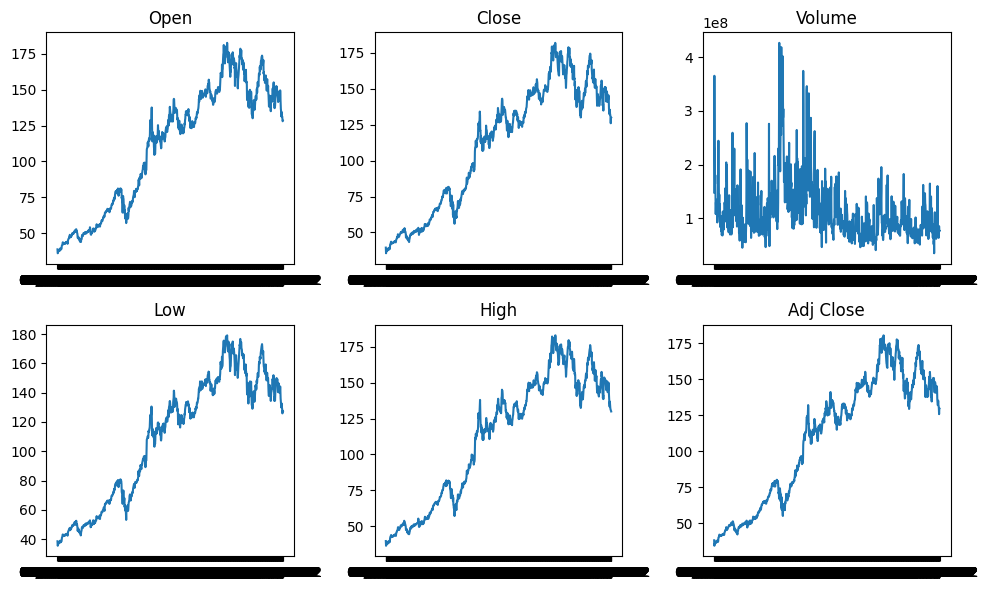

In [36]:
import matplotlib.pyplot as plt

# Tạo một khung lớn chứa 6 hình con
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Vẽ biểu đồ cho biến 'Open'
axes[0, 0].plot(df['Date'], df['Open'])
axes[0, 0].set_title('Open')

# Vẽ biểu đồ cho biến 'Close'
axes[0, 1].plot(df['Date'], df['Close'])
axes[0, 1].set_title('Close')

# Vẽ biểu đồ cho biến 'Volume'
axes[0, 2].plot(df['Date'], df['Volume'])
axes[0, 2].set_title('Volume')

# Vẽ biểu đồ cho biến 'Low'
axes[1, 0].plot(df['Date'], df['Low'])
axes[1, 0].set_title('Low')

# Vẽ biểu đồ cho biến 'High'
axes[1, 1].plot(df['Date'], df['High'])
axes[1, 1].set_title('High')

# Vẽ biểu đồ cho biến 'Adj Close'
axes[1, 2].plot(df['Date'], df['Adj Close'])
axes[1, 2].set_title('Adj Close')

# Đảm bảo các biểu đồ không trùng lắp trục x
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


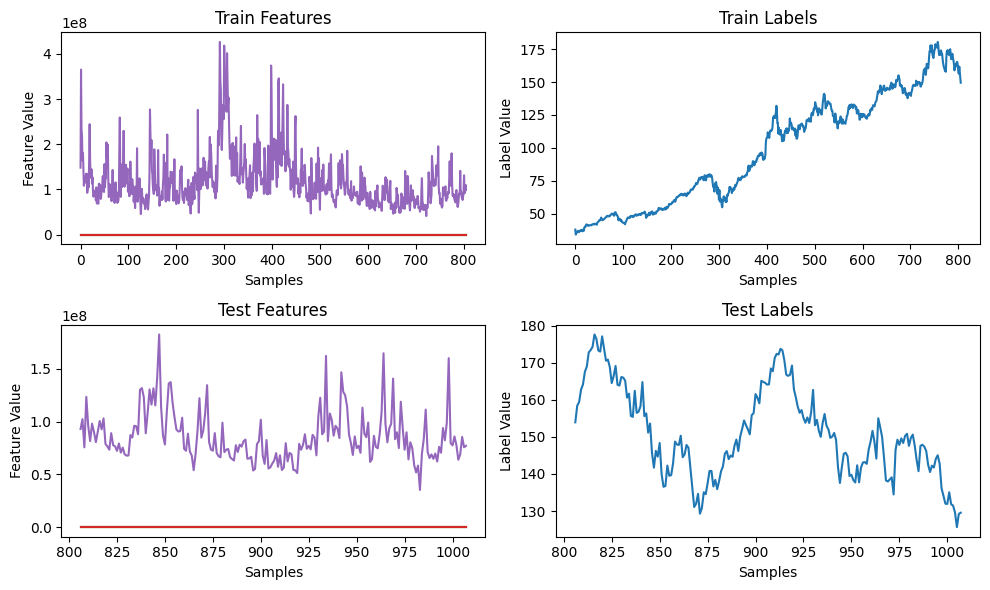

In [37]:
import matplotlib.pyplot as plt

# Thiết lập kích thước khung
plt.figure(figsize=(10, 6))

# Biểu đồ train_features
plt.subplot(2, 2, 1)
plt.plot(train_features)
plt.title('Train Features')
plt.xlabel('Samples')
plt.ylabel('Feature Value')

# Biểu đồ train_labels
plt.subplot(2, 2, 2)
plt.plot(train_labels)
plt.title('Train Labels')
plt.xlabel('Samples')
plt.ylabel('Label Value')

# Biểu đồ test_features
plt.subplot(2, 2, 3)
plt.plot(test_features)
plt.title('Test Features')
plt.xlabel('Samples')
plt.ylabel('Feature Value')

# Biểu đồ test_labels
plt.subplot(2, 2, 4)
plt.plot(test_labels)
plt.title('Test Labels')
plt.xlabel('Samples')
plt.ylabel('Label Value')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#Đánh giá và dự đoán mô hình

In [38]:
# Dự đoán dữ liệu từ tập huấn luyện
train_predictions = model.predict(train_features)
# Dự đoán dữ liệu từ tập kiểm tra
test_predictions = model.predict(test_features)

In [39]:
# Tính chỉ số đánh giá mse và r2

train_mse = mean_squared_error(train_labels, train_predictions)
train_r2_score = r2_score(train_labels, train_predictions)
print("Mean Squared Error:", train_mse)
print("R^2 score on training set:", train_r2_score)

test_mse = mean_squared_error(test_labels, test_predictions)
test_r2_score = r2_score(test_labels, test_predictions)
print("Mean Squared Error:", test_mse)
print("R^2 score on test set:", test_r2_score)

Mean Squared Error: 0.015542604868767188
R^2 score on training set: 0.9999912175669685
Mean Squared Error: 0.7552544633545776
R^2 score on test set: 0.9947663107435615


In [40]:
#Tính chỉ số đánh giá mae và rmse
train_errors = train_predictions - train_labels
test_errors = test_predictions - test_labels
mean_absolute_error_train = np.mean(np.abs(train_errors))
mean_absolute_error_test = np.mean(np.abs(test_errors))
root_mean_squared_error_train = np.sqrt(np.mean(train_errors**2))
root_mean_squared_error_test = np.sqrt(np.mean(test_errors**2))
print("MAE Train:", mean_absolute_error_train)
print("RMSE Train:", root_mean_squared_error_train)
print("MEA Test:", mean_absolute_error_test)
print("RMSE Test:", root_mean_squared_error_test)

MAE Train: 0.08161442782332522
RMSE Train: 0.1246699838323852
MEA Test: 0.7513967012969955
RMSE Test: 0.8690537747197107


In [41]:
# Tính phần trăm sai sốt tuyệt đối (MAPE)
mape = 100 * (abs(test_errors) / test_labels)
# Tính toán và độ hiển thị chính sác
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.49 %.


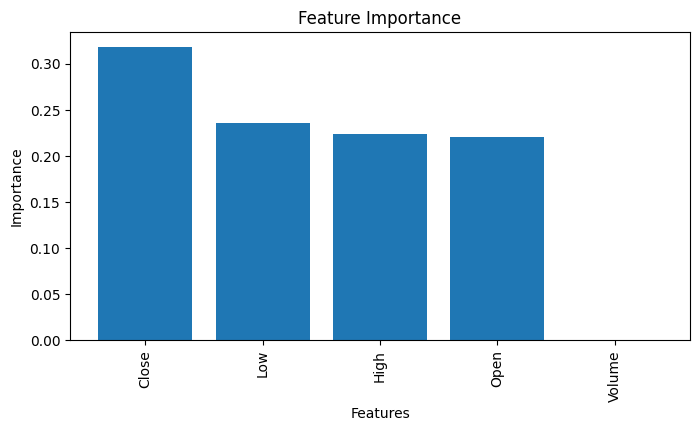

In [42]:
import matplotlib.pyplot as plt

# Lấy độ quan trọng của các biến
importances = model.feature_importances_

# Tạo mảng các tên biến
feature_names = train_features.columns

# Sắp xếp các độ quan trọng theo thứ tự giảm dần
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Vẽ biểu đồ sự độ quan trọng của các biến
plt.figure(figsize=(8, 4))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [43]:
# Tính ma trận tương quan
# df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
correlation_matrix = df.corr()
correlation_matrix

ValueError: could not convert string to float: '01/02/2019'

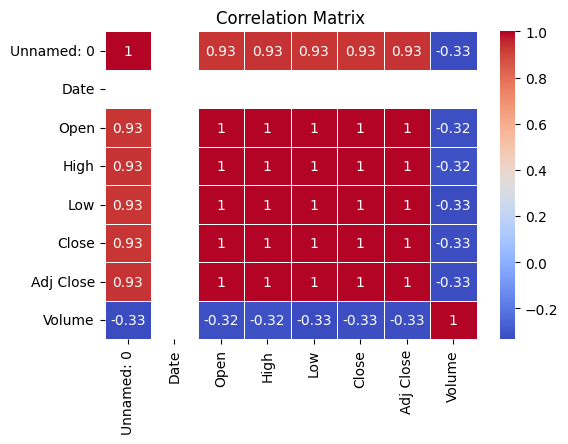

In [ ]:
# Vẽ biểu đồ tương quan
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Tạo Actuel và Predicted đánh giá độ tương quan giữa giá trị thực tế và giá trị dự đoán
pred_df = pd.DataFrame({'Actual': test_labels, 'Predicted': test_predictions})
pred_df.head()

,Actual,Predicted
806,153.943222,152.506092
807,158.409958,157.903226
808,159.432343,158.964363
809,162.767487,162.515573
810,164.157135,163.770253


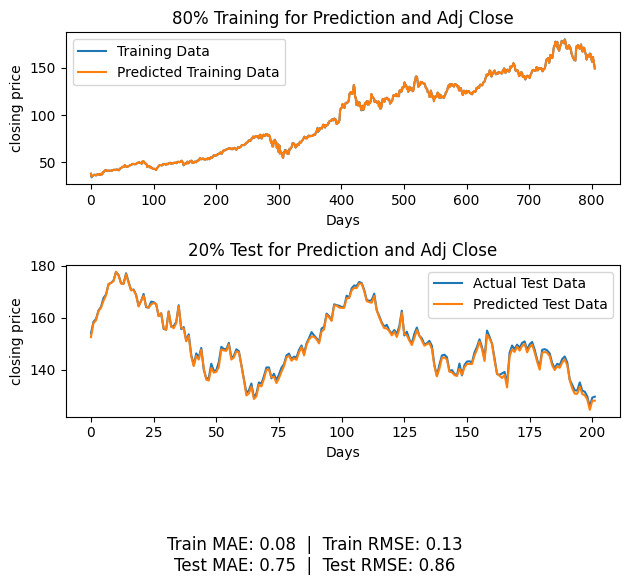

In [ ]:
plt.subplot(2, 1, 1)
plt.title("80% Training for Prediction and Adj Close")
plt.plot(train_labels, label='Training Data')
plt.plot(train_predictions, label='Predicted Training Data')
plt.ylabel('closing price')
plt.xlabel('Days')
plt.legend()
x = np.arange(len(test_predictions))

plt.subplot(2, 1, 2)
plt.title("20% Test for Prediction and Adj Close")
plt.plot(x, test_labels, label='Actual Test Data')
plt.plot(x, test_predictions, label='Predicted Test Data')
plt.ylabel('closing price')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.text(0.5, -0.2, f"Train MAE: {mean_absolute_error_train:.2f}  |  Train RMSE: {root_mean_squared_error_train:.2f}\nTest MAE: {mean_absolute_error_test:.2f}  |  Test RMSE: {root_mean_squared_error_test:.2f}", transform=plt.gcf().transFigure, fontsize=12, ha='center')
plt.show()